## 直方图匹配

  通过某种变换将图像A的直方图调整为图像B的直方图

In [87]:
from skimage import io,data,img_as_ubyte
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [88]:
global T 
T = np.zeros((256))

In [89]:
def histogram(img):
    height = img.shape[0]
    width  = img.shape[1]
    hist = np.zeros((256))
    for i in np.arange(height):
        for j in np.arange(width):
            a = int(img[i,j])
            hist[a] += 1
    return hist

def cumulative(hist):
    cum_hist=hist.copy()
    for i in np.arange(1,256):
        cum_hist[i]=cum_hist[i-1]+cum_hist[i]
    return cum_hist


In [90]:
def histogram_match(org,ref):
    L =256

    for i in np.arange(L):
        j = L - 1
        T[i] = j
        while j>=0 and org[i] < ref[j]:
            T[i] = j
            j = j - 1

def matching(x):
    return T[int(x)]

/anaconda3/envs/image-processing/lib/python3.7/site-packages/skimage/util/dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


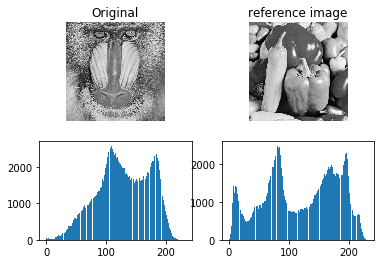

In [103]:
org = io.imread("images/Mandrill.tiff",as_gray=True)
ref = io.imread("images/Pepper.tiff",as_gray=True)

org = img_as_ubyte(org)
ref = img_as_ubyte(ref)
plt.subplot(221)
plt.imshow(org,plt.cm.gray)
plt.title('Original')
plt.axis('off')
plt.subplot(223)
plt.hist(org.reshape(-1,),256)

plt.subplot(222)
plt.imshow(ref,plt.cm.gray)
plt.title('reference image')
plt.axis('off')
plt.subplot(224)
plt.hist(ref.reshape(-1,),256)

h_org = org.shape[0]
w_org = org.shape[1]
p_org = h_org * w_org

h_ref = ref.shape[0]
w_ref = ref.shape[1]
p_ref = h_ref * w_ref

hist_org = histogram(org)
hist_ref = histogram(ref)

cum_hist_org = cumulative(hist_org)
cum_hist_ref = cumulative(hist_ref)

prob_cum_hist_org = cum_hist_org/p_org
prob_cum_hist_ref = cum_hist_ref/p_ref

In [104]:
histogram_match(prob_cum_hist_org,prob_cum_hist_ref)
img = np.frompyfunc(matching,1,1)(org).astype(np.float)

Text(0.5, 1.0, 'Ref')

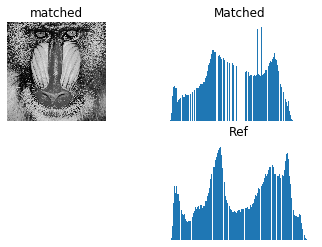

In [108]:
plt.subplot(221)
plt.imshow(img,plt.cm.gray)
plt.title('matched')
plt.axis('off')
plt.subplot(222)
_,_,_ = plt.hist(img.reshape(-1,),256)
plt.axis('off')
plt.title('Matched')
plt.subplot(224)
_,_,_ = plt.hist(ref.reshape(-1,),256)
plt.axis('off')
plt.title('Ref')